In [17]:
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
df = pd.read_csv('../datasets/modelos.csv')
df = df[['Dado Real', 'Modelo 1', 'Modelo 2']]
df['Erro 1'] = df['Dado Real'] - df['Modelo 1']
df['Erro 2'] = df['Dado Real'] - df['Modelo 2']

In [13]:
stats = df.describe()

In [14]:
mean1, mean2 = stats.loc['mean', ['Erro 1', 'Erro 2']]
median1, median2 = stats.loc['50%', ['Erro 1', 'Erro 2']]
std1, std2 = stats.loc['std', ['Erro 1', 'Erro 2']] 
iqr1 = stats.loc['75%', 'Erro 1'] - stats.loc['25%', 'Erro 1']
iqr2 = stats.loc['75%', 'Erro 2'] - stats.loc['25%', 'Erro 2']
cv1 = round(std1/mean1*100)
cv2 = round(std2/mean2*100)

In [15]:
data = {'Erro 1': [mean1, median1, std1, iqr1, cv1],
        'Erro 2': [mean2, median2, std2, iqr2, cv2]}
index = ['Média', 'Mediana', 'Desvio Padrão', 'Intervalo Interquartílico', 'Coeficiente de Variação']

df2 = pd.DataFrame(data, index=index)

In [16]:
df2

,Erro 1,Erro 2
Média,-2.598100,0.511125
Mediana,-2.619500,-0.441000
Desvio Padrão,0.565244,5.437388
Intervalo Interquartílico,0.889750,9.435000
Coeficiente de Variação,-22.000000,1064.000000


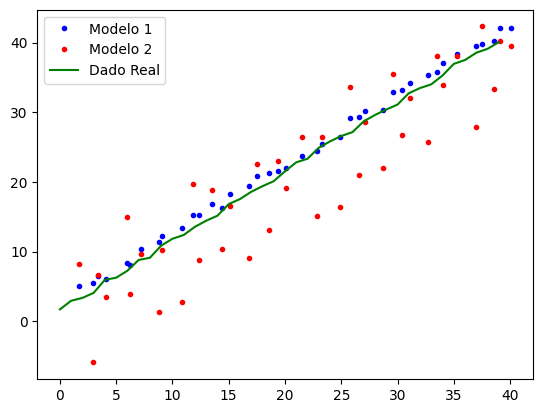

In [85]:
plt.plot(df['Dado Real'], df['Modelo 1'], '.b')
plt.plot(df['Dado Real'], df['Modelo 2'], '.r')
plt.plot(df['Dado Real'], 'g')
plt.legend(['Modelo 1', 'Modelo 2', 'Dado Real'])
plt.show()

Pela média e mediana poderíamos concluir que o modelo 2 é melhor que o modelo 1, porém quando analisamos o desvio dos dois modelos podemos concluir que os dados do modelo 2 estão mais dispersos do que o modelo um. Sendo assim o modelo um está mais próximo dos dados reais, como podemos ver no gráfico.

# Criando um terceiro modelo ( O melhor modelo menos a média dele)

In [72]:
df['Modelo 3'] = df['Modelo 1'].apply(lambda x: x+mean1)

In [73]:
df['Erro 3'] = df['Dado Real'] - df['Modelo 3']
stats = df.describe()
df

,Dado Real,Modelo 1,Modelo 2,Erro 1,Erro 2,Modelo 3,Erro 3
0,1.692,5.039,8.270,-3.347,-6.578,2.4409,-0.7489
1,2.933,5.466,-5.929,-2.533,8.862,2.8679,0.0651
2,3.343,6.514,6.598,-3.171,-3.255,3.9159,-0.5729
3,4.069,6.034,3.418,-1.965,0.651,3.4359,0.6331
4,5.946,8.419,14.936,-2.473,-8.990,5.8209,0.1251
5,6.244,8.122,3.929,-1.878,2.315,5.5239,0.7201
6,7.249,10.374,9.620,-3.125,-2.371,7.7759,-0.5269
7,8.792,11.396,1.267,-2.604,7.525,8.7979,-0.0059
8,9.111,12.167,10.166,-3.056,-1.055,9.5689,-0.4579
9,10.849,13.425,2.782,-2.576,8.067,10.8269,0.0221


In [74]:
mean1, mean2, mean3 = stats.loc['mean', ['Erro 1', 'Erro 2', 'Erro 3']]
median1, median2, median3 = stats.loc['50%', ['Erro 1', 'Erro 2', 'Erro 3']]
std1, std2, std3 = stats.loc['std', ['Erro 1', 'Erro 2', 'Erro 3']] 
iqr1 = stats.loc['75%', 'Erro 1'] - stats.loc['25%', 'Erro 1']
iqr2 = stats.loc['75%', 'Erro 2'] - stats.loc['25%', 'Erro 2']
iqr3 = stats.loc['75%', 'Erro 3'] - stats.loc['25%', 'Erro 3']
cv1 = round(std1/mean1*100)
cv2 = round(std2/mean2*100)
cv3 = round(std3/mean3*100)

In [75]:
data = {'Erro 1': [mean1, median1, std1, iqr1, cv1],
        'Erro 2': [mean2, median2, std2, iqr2, cv2],
        'Erro 3': [mean3, median3, std3, iqr3, cv3]}
index = ['Média', 'Mediana', 'Desvio Padrão', 'Intervalo Interquartílico', 'Coeficiente de Variação']

df3 = pd.DataFrame(data, index=index)

In [76]:
df3

,Erro 1,Erro 2,Erro 3
Média,-2.598100,0.511125,8.548717e-16
Mediana,-2.619500,-0.441000,-2.140000e-02
Desvio Padrão,0.565244,5.437388,5.652439e-01
Intervalo Interquartílico,0.889750,9.435000,8.897500e-01
Coeficiente de Variação,-22.000000,1064.000000,6.612032e+16


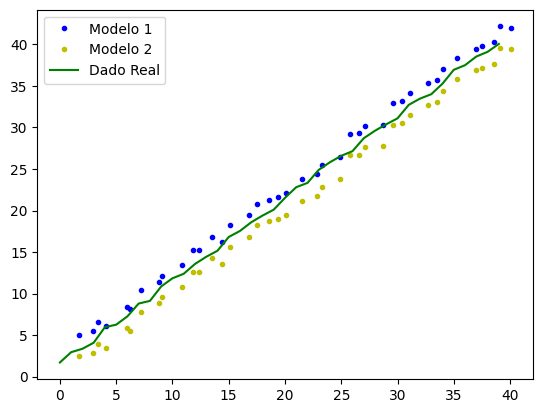

In [79]:
plt.plot(df['Dado Real'], df['Modelo 1'], '.b')
#plt.plot(df['Dado Real'], df['Modelo 2'], '.r')
plt.plot(df['Dado Real'], df['Modelo 3'], '.y')
plt.plot(df['Dado Real'], 'g')
plt.legend(['Modelo 1', 'Modelo 2', 'Dado Real'])
plt.show()